In [38]:
# get libs
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import sklearn.cross_validation
%matplotlib inline

In [39]:
# get data
# sample data at:
# from sklearn.datasets import load_boston
# boston = load_boston()
from sklearn.datasets import load_boston
boston = load_boston()

In [40]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [41]:
boston.data.shape

(506, 13)

In [42]:
# convert data (if not already) to a pandas dataframe
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
# for use with sample data, replace column names
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
# add price from sample data
bos['PRICE']  = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
# fit a model with scikit
# assign response variable to X and remove from data
X = bos.drop('PRICE', axis = 1)
# store linear regression object in a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# lm.fit() -> fits a linear model
# lm.predict() -> Predict Y using the linear model with estimated coefficients
# lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model.

In [47]:
lm.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.491103280361244


In [49]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [50]:
# create dataframe that contains features and estimated coefficients
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

TypeError: data argument can't be an iterator

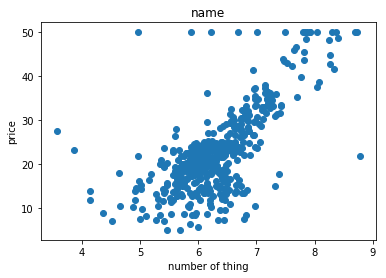

In [51]:
# plot
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("number of thing")
plt.ylabel("price")
plt.title('name')
plt.show()

In [15]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          # predict first 5 of whatever
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Text(0.5,1,'Price vs predicted prices: $Y_i$ vs $\\hat{Y}_i$')

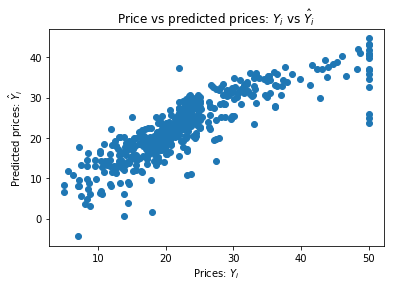

In [16]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title("Price vs predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [17]:
# calculate mean squared error
mseFull =  np.mean((bos.PRICE - lm.predict(X)) **2)
print(mseFull)

21.897779217687486


In [25]:
# calculate for one feature
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(msePTRATIO)

62.65220001376926


In [32]:
# train-test split
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, bos.PRICE, test_size=0.33, random_state = 5)

In [33]:
# build using new train and test sets
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [34]:
print('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train))**2))
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test-lm.predict(X_test))**2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534663
Fit a model X_Train, and calculate MSE with X_test, Y_test: 28.541367275618335


## Residual Tests

Text(0,0.5,'Residuals')

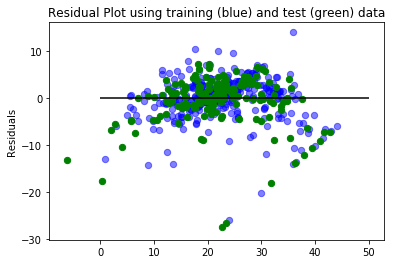

In [36]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y= 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')